# Topic: Classification (ML+DL)

# Step 1: load data, import library

In [16]:
# step 1: Load data, import library
# import torch
# import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# define function

# def getParameters(model):
#   w,b =model.parameters()
#   w1=w[0][0].item()
#   w2=w[0][1].item()
#   b=b[0].item()
#   return w1,w2,b

# generate data =================
# 
# make 3 blobs ==========================
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X,y = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)


In [17]:


def plotBoundary(X,y,model):
  row_condition= (y==0)

  plt.scatter(X[row_condition,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

  x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
  y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
  xx,yy=np.meshgrid(x_span,y_span)
  print(x_span.shape,xx.shape)
  grid=np.c_[xx.ravel(),yy.ravel()]
  
  z=model.predict_proba(grid)
  print(type(z),z.shape)
  plt.contour(xx,yy,z)
  plt.show()


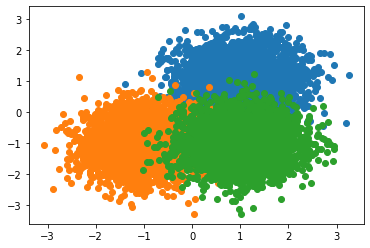

In [18]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()


# Step 2 : Preprocessing

In [19]:
#step 2 : Preprocessing for ML
print(type(X),X.shape)
print(type(y),y.shape)
print(y[:5])

#step 2 : Preprocessing for DL
# tensor_X=torch.FloatTensor(X)
# tensor_y=torch.FloatTensor(y.reshape(n_samples,1))
# print(tensor_X.size())
# print(tensor_y.size())

<class 'numpy.ndarray'> (10000, 2)
<class 'numpy.ndarray'> (10000,)
[0 0 2 2 1]



<img src= "https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=500 />


# Step 3: Build Model
<a href="https://medium.com/pursuitnotes/day-12-kernel-svm-non-linear-svm-5fdefe77836c">參考blog</a>

In [20]:
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
xx.shape= (50, 50)
xx.shape= (50, 50)
z.shape= (2500, 3)
z0= [[0.   0.   0.   ... 0.01 0.01 0.01]
 [0.   0.   0.   ... 0.01 0.01 0.01]
 [0.   0.   0.   ... 0.01 0.01 0.01]
 ...
 [0.45 0.45 0.45 ... 1.   1.   1.  ]
 [0.45 0.45 0.45 ... 1.   1.   1.  ]
 [0.45 0.45 0.45 ... 1.   1.   1.  ]]
<class 'numpy.ndarray'> (50, 50)


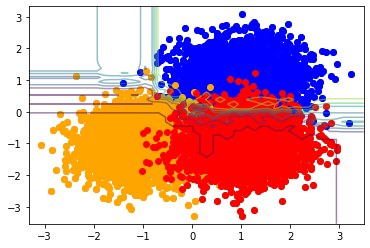

z1= [[1.   1.   1.   ... 0.   0.   0.  ]
 [1.   1.   1.   ... 0.   0.   0.  ]
 [1.   1.   1.   ... 0.   0.   0.  ]
 ...
 [0.55 0.55 0.55 ... 0.   0.   0.  ]
 [0.55 0.55 0.55 ... 0.   0.   0.  ]
 [0.55 0.55 0.55 ... 0.   0.   0.  ]]
<class 'numpy.ndarray'> (50, 50)


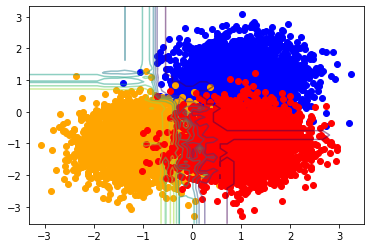

z2= [[0.   0.   0.   ... 0.99 0.99 0.99]
 [0.   0.   0.   ... 0.99 0.99 0.99]
 [0.   0.   0.   ... 0.99 0.99 0.99]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
<class 'numpy.ndarray'> (50, 50)


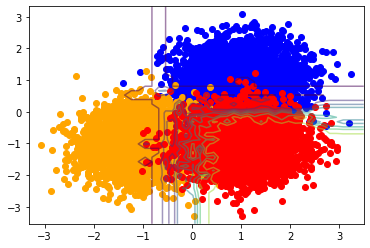

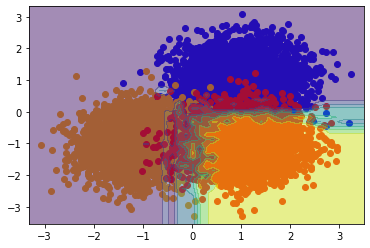

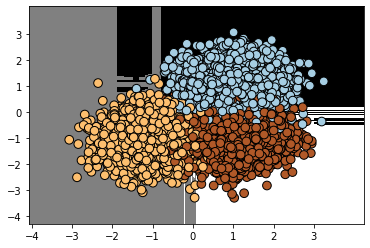

In [21]:
# step 3: Build model for ML
# Fitting Kernel SVM to the Training set
# 
#https://ithelp.ithome.com.tw/articles/10206240
''' examples for other classifier ==========================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
#通過每個估計器擬合80％的訓練點
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)
================================================================='''

# from sklearn.utilities import visualize_classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
#通過每個估計器擬合80％的訓練點
model= BaggingClassifier(tree, n_estimators=100, max_samples=0.8,random_state=1)


model.fit(X, y)

y_hat=model.predict_proba(X)
print(y_hat[:5])


plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
xx,yy=np.meshgrid(x_span,y_span)
print('xx.shape=',xx.shape)
grid=np.c_[xx.flatten(), yy.flatten()]

print("xx.shape=",xx.shape)
z=model.predict_proba(grid)
print("z.shape=",z.shape)
z0=z[:,0].reshape(xx.shape)
print('z0=',z0)
print(type(z0),z0.shape)
plt.scatter(X[y==0,0],X[y==0,1],c="blue")
plt.scatter(X[y==1,0],X[y==1,1],c="orange")
plt.scatter(X[y==2,0],X[y==2,1],c="red")
plt.contour(xx,yy,z0,alpha=0.5)
plt.show()

z1=z[:,1].reshape(xx.shape)
print('z1=',z1)
print(type(z1),z1.shape)
plt.scatter(X[y==0,0],X[y==0,1],c="blue")
plt.scatter(X[y==1,0],X[y==1,1],c="orange")
plt.scatter(X[y==2,0],X[y==2,1],c="red")
plt.contour(xx,yy,z1,alpha=0.5)
plt.show()

z2=z[:,2].reshape(xx.shape)
print('z2=',z2)
print(type(z2),z2.shape)
plt.scatter(X[y==0,0],X[y==0,1],c="blue")
plt.scatter(X[y==1,0],X[y==1,1],c="orange")
plt.scatter(X[y==2,0],X[y==2,1],c="red")
plt.contour(xx,yy,z2,alpha=0.5)
plt.show()

plt.scatter(X[y==0,0],X[y==0,1],c="blue")
plt.scatter(X[y==1,0],X[y==1,1],c="orange")
plt.scatter(X[y==2,0],X[y==2,1],c="red")
plt.contourf(xx,yy,z2,alpha=0.5)
plt.show()


visualize_classifier(model, X, y)

In [22]:
#step 3: build model for DL

# class MyDNN(nn.Module):
#   def __init__(self,inSize,h1Size,h2Size,outSize):
#     super().__init__()
#     self.linear=nn.Linear(inSize,h1Size)
#     self.linear2=nn.Linear(h1Size,h2Size)
#     self.linear3=nn.Linear(h2Size,outSize)
#   def forward(self,x):
#       x=self.linear(x)
#       x=torch.sigmoid(x)
#       x=self.linear2(x)
#       x=torch.sigmoid(x)
#       x=self.linear3(x)
#       x=torch.sigmoid(x)
#       return x
#   def predict(self,x):
#       pred=self.forward(x)
#       if pred >=0.5: 
#         return 1
#       return 0


# model=MyDNN(2,10,4,1)
# print(model)


In [23]:
# #step 4 training
# criterion=nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# epochs=5000
# losses=[]
# for e in range(epochs):
#   #compute loss
#   if e%1000 ==0: print("*",end="")
#   y_hat=model(tensor_X)
#   loss=criterion(y_hat,tensor_y)
#   losses.append(loss)
 
#   # 3 steps for Gradient update
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
# plt.plot(range(epochs),losses)



In [24]:
# plot results
